In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
import matplotlib.lines as mlines

sns.set(font_scale=1, rc={'text.usetex': True})
sns.set_style("whitegrid")

### Rewards

In [67]:
def plot_2player_sd(df, name):
    ax = sns.lineplot(data=df,
              x='episode',
              y='reward',
              hue='game type',
              )

    ax.set(xlabel='Penalty value $p$', ylabel='Average return')
    plt.show()
    plt.close()
    
    
def get_env_data(env, N):
    df = pd.DataFrame()
    for penalization in [False, True]:
        log_str = '{}-player-{}-penalization-{}.csv'.format(N, env, penalization)
        log_dir = os.path.join('exps', env, log_str)
        df_new = None
        if os.path.exists(log_dir):
            df_new = pd.read_csv(log_dir)
            df_new['reward'] = (df_new.reward-df_new.reward.min())/(df_new.reward.max()-df_new.reward.min())
            df_new = df_new.rename(columns={"penalization": "Game Type"})
            df_new['env'] = env
            df_new = df_new[df_new['agent']=='sum']
            df = df.append(df_new) 
    return df

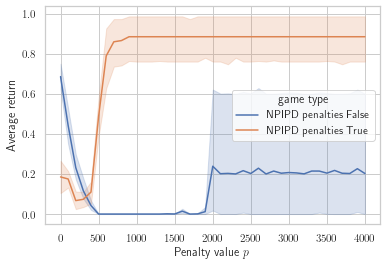

In [76]:
env = 'NPIPD' # choose from ['PD', 'SH', 'CH', 'NPIPD']
N = 64
df = get_env_data(env, N)
plot_2player_sd(df, env)

In [41]:
df

,Unnamed: 0,run,episode,Game Type,agent,reward,penalty,share_cooperators,successful_sanction_c,successful_sanction_d,C-,D-,CC,CD,DC,DD,env
0,1,0,0,False,sum,0.0,-1.9,0.0,0,0,0,2,0,0,0,0,PD
1,101,0,100,False,sum,0.0,-1.9,0.0,0,0,0,2,0,0,0,0,PD
2,201,0,200,False,sum,0.5,-1.9,0.5,0,0,1,1,0,0,0,0,PD
3,301,0,300,False,sum,0.0,-1.9,0.0,0,0,0,2,0,0,0,0,PD
4,401,0,400,False,sum,1.0,-1.9,1.0,0,0,2,0,0,0,0,0,PD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,19601,4,3600,True,sum,1.0,-1.9,1.0,0,0,1,0,0,1,0,0,PD
201,19701,4,3700,True,sum,1.0,-1.9,1.0,0,0,1,0,0,1,0,0,PD
202,19801,4,3800,True,sum,1.0,-1.9,1.0,0,0,1,0,0,1,0,0,PD
203,19901,4,3900,True,sum,1.0,-1.9,1.0,0,0,1,0,0,1,0,0,PD
